# 1. Introduction and Objective

Happiness is a crucial measure of societal well-being, reflecting the quality of life and overall satisfaction of individuals within a country. This project aims to explore and model the factors that contribute to a country's happiness, as measured by the Ladder score in the World Happiness Report. The Ladder score, which ranges from 0 to 10, provides a quantifiable metric for understanding the relative happiness of nations worldwide. By leveraging various statistical and machine learning models, this study seeks to identify and quantify the relationship between a country's happiness level and key socio-economic and societal factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. The ultimate goal is to determine the most significant predictors of happiness, understand how these factors interact with the ladder score, and build machine learning models and choose a model that best predicts a country's ladder score.

## Hypothesis

My hypothesis is that, logged GDP per capita, social support, healthy life expectancy, and freedom to make life choices, generosity, and perceptions of corruption are significant factors in determining a country's ladder score which is how happy that country is

# 2. Dataset Selection and Description

We will use a dataset from Kaggle that includes 149 entries (different countries). The link to the dataset is found here: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?resource=download

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv('world-happiness-report-2021.csv', encoding='ISO-8859-1')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ï»¿Country name                             149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

As stated in my hypothesis, we will mainly focus on the features: ladder score, logged GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, perceptions of corruption. 

- Ladder Score: A ladder score, also known as a happiness score, is a metric used to measure a country's citizens' happiness.
- Logged GDP per capita: a way to represent GDP per capita using logarithms.
- Social Support: Score on the level of emotional, practical, and informational assistance that individuals within a nation can access from their family, friends, community, and government programs.
- Healthy Life Expectancy: a population health statistic that measures the average number of years a person can expect to live in good health.
- Freedom to make life choices: Score on the right to decide how to live your life and what you want to do with it.
- Generosity: Score on how many people in that country donate money, volunteer, or help strangers
- Perceptions of corruption: Score on how people perceive corruption in their government and other insitutions.

In [3]:
df.head()

,ï»¿Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Data Pre-Processing

Before we begin, lets check for any missing data and remove rows where there is

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

ï»¿Country name - 0.0%
Regional indicator - 0.0%
Ladder score - 0.0%
Standard error of ladder score - 0.0%
upperwhisker - 0.0%
lowerwhisker - 0.0%
Logged GDP per capita - 0.0%
Social support - 0.0%
Healthy life expectancy - 0.0%
Freedom to make life choices - 0.0%
Generosity - 0.0%
Perceptions of corruption - 0.0%
Ladder score in Dystopia - 0.0%
Explained by: Log GDP per capita - 0.0%
Explained by: Social support - 0.0%
Explained by: Healthy life expectancy - 0.0%
Explained by: Freedom to make life choices - 0.0%
Explained by: Generosity - 0.0%
Explained by: Perceptions of corruption - 0.0%
Dystopia + residual - 0.0%


There is no missing data in the dataset so we do not have to remove any rows.

The label for the feature country name does not look right so lets rename it to `Country Name`.

In [5]:
df = df.rename(columns={'ï»¿Country name': 'Country Name'})
df.head()

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


For our analysis, we will also change the categorical data from objects to numbers using a label encoder

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country Name'] = label_encoder.fit_transform(df['Country Name'])
df['Regional indicator'] = label_encoder.fit_transform(df['Regional indicator'])
df.head()

,Country Name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,40,9,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,33,9,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,128,9,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,54,9,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,96,9,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Now that the features are numerical, we can now standardize the data to bring all features to a similar scale

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

Now that the data is processed and usable, we can begin our analysis

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Summary Statistics

In [9]:
columns_of_interest = ['Ladder score']
summary = df[columns_of_interest].describe()
print(summary)

       Ladder score
count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000


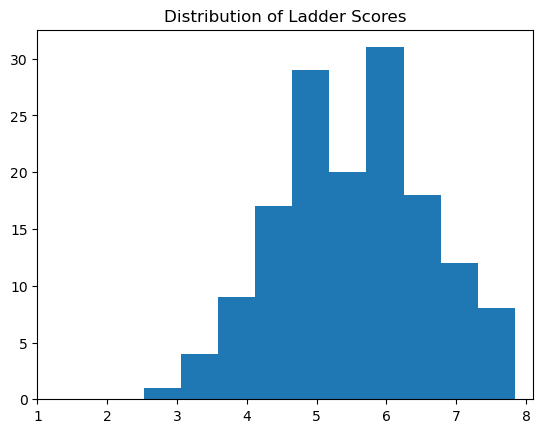

In [10]:
plt.hist(df['Ladder score'])
plt.title('Distribution of Ladder Scores')
plt.xticks(np.arange(1, df['Ladder score'].max() + 1, 1))
plt.show()

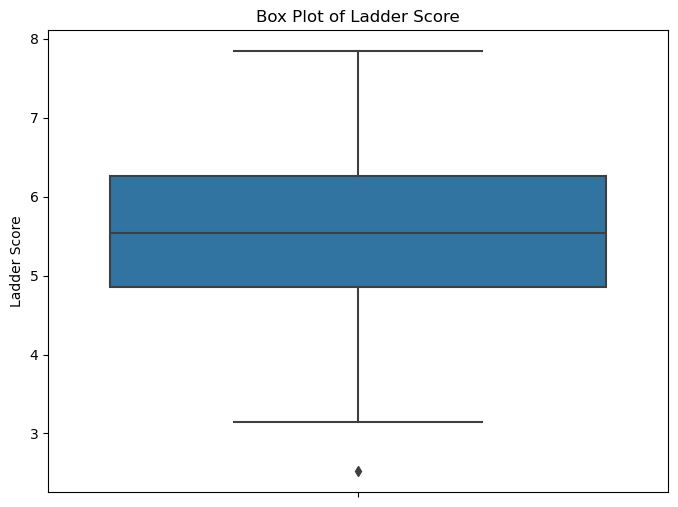

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = df['Ladder score'])
plt.title("Box Plot of Ladder Score")
plt.ylabel("Ladder Score")
plt.show()

C:\Users\ericz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


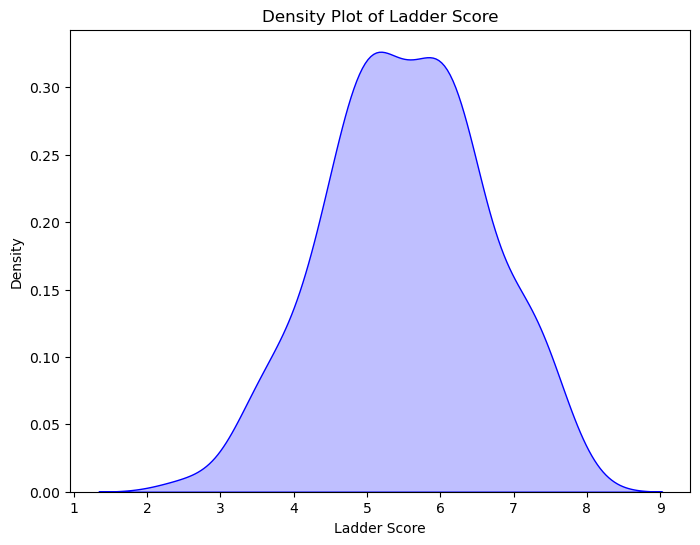

In [12]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Ladder score'], fill=True, color="blue")
plt.title("Density Plot of Ladder Score")
plt.xlabel("Ladder Score")
plt.ylabel("Density")
plt.show()

From the summary statistics, the histogram, the box plot, and the density plot, we see that the average ladder score is 5.53 and that most ladder scores fall between around the 5-6 area. Across the visualizations, the `Ladder score` displays a near-normal distribution, centered around the mean with some skewness in the lower tail, indicating that a few countries scored significantly lower on happiness.

## Bivariate Analysis

Lets make some scatter plots to identify which features may contribute to the overall `Ladder score`.

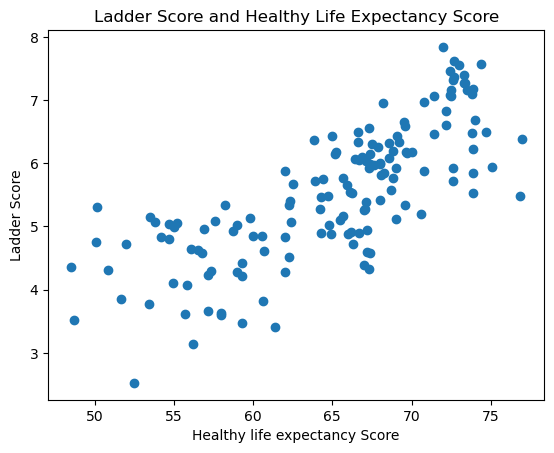

In [13]:
plt.scatter(df['Healthy life expectancy'], df['Ladder score'])
plt.title('Ladder Score and Healthy Life Expectancy Score')
plt.xlabel('Healthy life expectancy Score')
plt.ylabel('Ladder Score')
plt.show()

We can see a positive correlation with a healthy life expectancy and the overall Ladder Score indicating that having a high life expectancy may contribute to a happier country. 

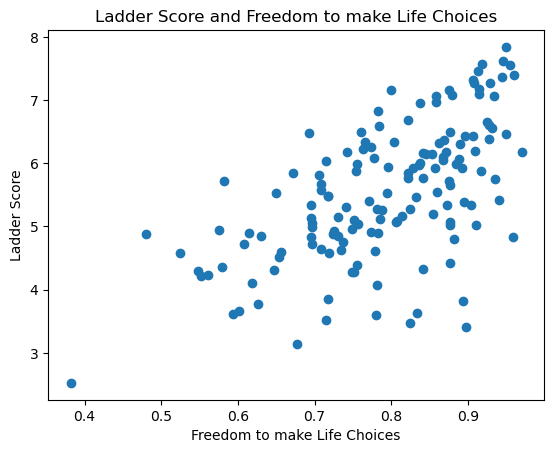

In [14]:
plt.scatter(df['Freedom to make life choices'], df['Ladder score'])
plt.title('Ladder Score and Freedom to make Life Choices')
plt.xlabel('Freedom to make Life Choices')
plt.ylabel('Ladder Score')
plt.show()

There seems to be a positive correlation with the freedom to make life choices and the overall ladder score although it does not appear very strong.

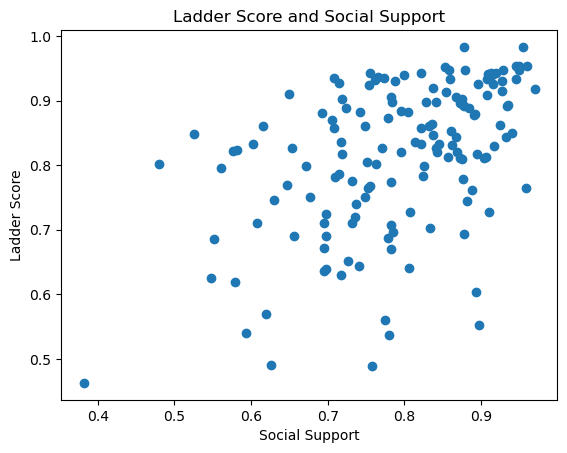

In [15]:
plt.scatter(df['Freedom to make life choices'], df['Social support'])
plt.title('Ladder Score and Social Support')
plt.xlabel('Social Support')
plt.ylabel('Ladder Score')
plt.show()

There seems to be a positive correlation with the `social support` and the overall `ladder score` although it does not appear very strong.

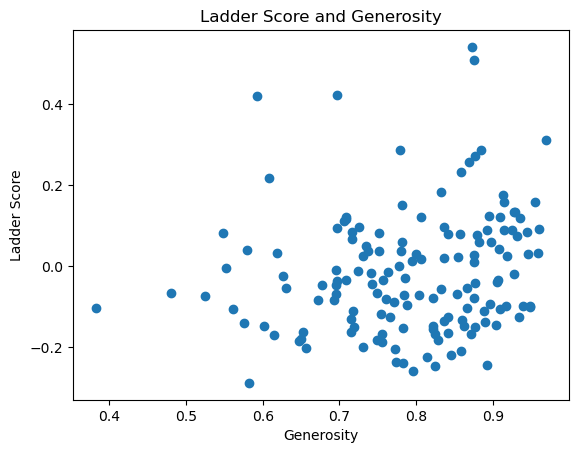

In [16]:
plt.scatter(df['Freedom to make life choices'], df['Generosity'])
plt.title('Ladder Score and Generosity')
plt.xlabel('Generosity')
plt.ylabel('Ladder Score')
plt.show()

There appears to not be any correlation between how generous a country's people are and the overall happiness score.

Lets make some more visualizations for the relationship between `Ladder score` and `Healthy life expectancy` since it seems to have the strongest correlation

In [17]:
life_ladder_df = df[['Healthy life expectancy', 'Ladder score']]

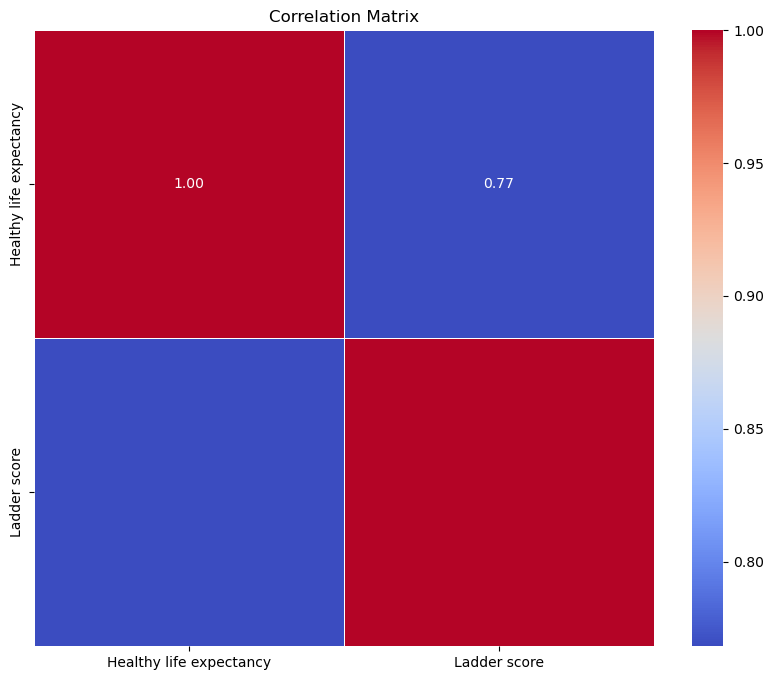

In [18]:
corr_matrix = life_ladder_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\ericz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ericz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


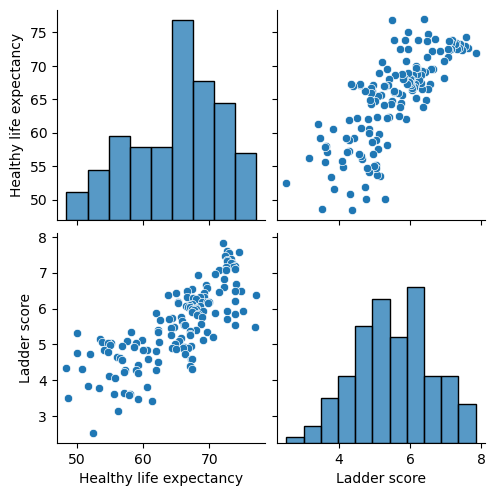

In [19]:
sns.pairplot(df[['Healthy life expectancy', 'Ladder score']])
plt.show()

As you can see from the correlation matric and the pairplot, there is a sizable correlation between a country's life expectancy and ladder score.

# Multivariate Analysis

In [20]:
columns_of_interest = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df2 = df[columns_of_interest]

In [21]:
if 'Ladder score in Dystopia' not in df2.columns:
    print("The column 'Ladder score in Dystopia' is missing from the DataFrame.")

The column 'Ladder score in Dystopia' is missing from the DataFrame.


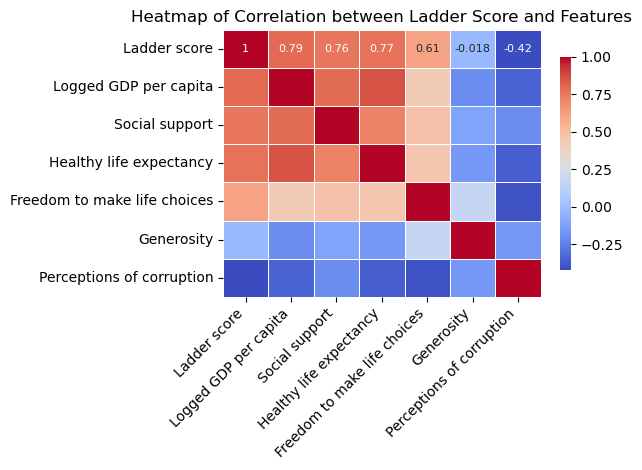

In [22]:
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.title('Heatmap of Correlation between Ladder Score and Features')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)              
plt.tight_layout()  
plt.show()

It appears that `Generosity`, `Perceptions of corruption` show very low correlation. Therefore its unlikely they will be beneficial for our model. Lets remove them and generate a pairplot with the features that demonstrate sizable correlation.

In [23]:
columns_with_sizable_correlation = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']
df3 = df[columns_with_sizable_correlation]

C:\Users\ericz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ericz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ericz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ericz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

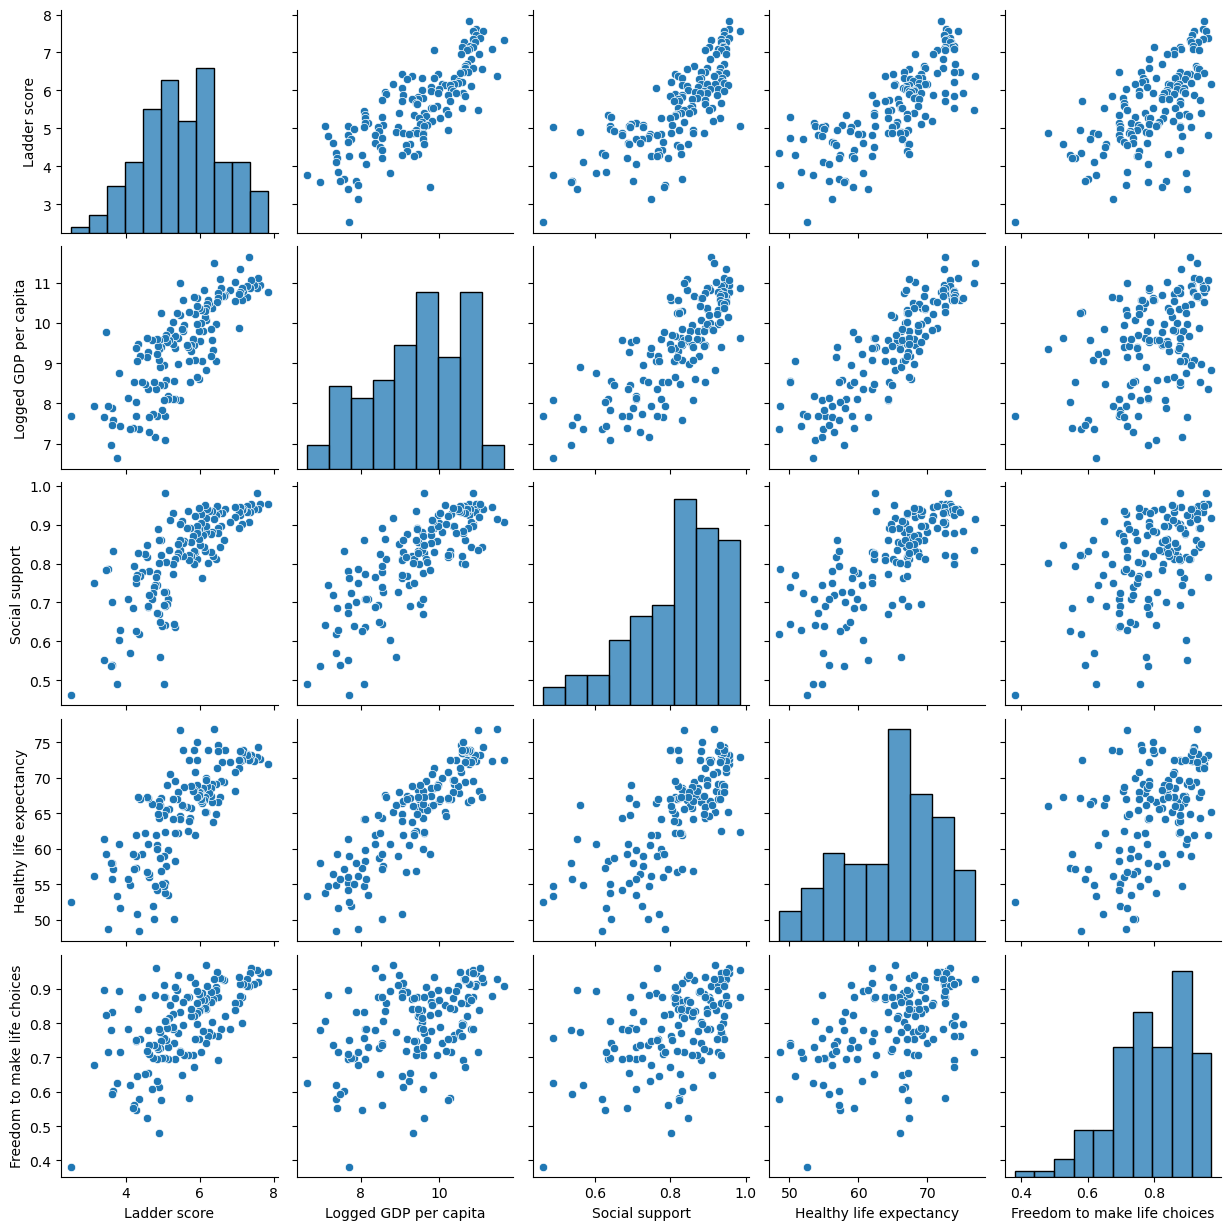

In [24]:
sns.pairplot(df3)
plt.show()

Overall, the `Ladder score`, `Logged GDP per capita`, `Social support`, `Healthy life expectancy`, and `Freedom to make life choices` features show a sizable correlation. We will base our model using these features as our independent variables.

Lets conduct a PCA to reduce the dimensionality from our predictors

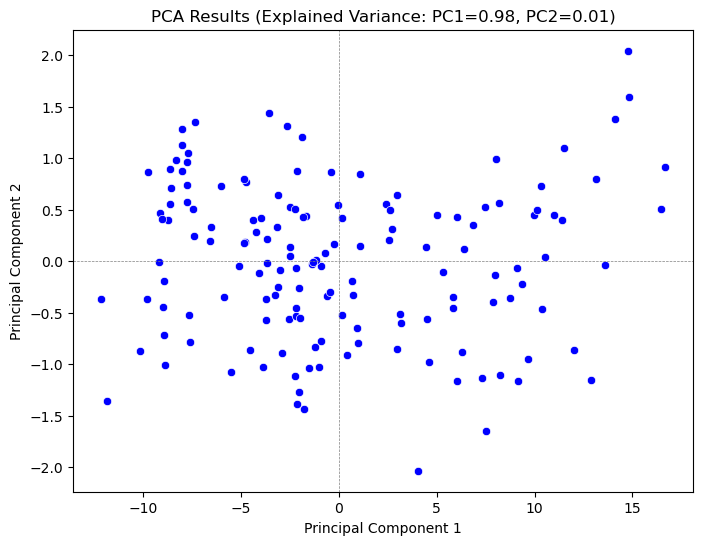

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
principal_components = pca.fit_transform(df3)
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df, color='blue')
plt.title(f"PCA Results (Explained Variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

The PCA scatter plot reveals that the first principal component (PC1) captures 98% of the variance in the dataset, while the second principal component (PC2) accounts for only 1%. This indicates that the dataset's variability is almost entirely explained by PC1, reflecting strong correlations among the original predictors.

# 5. Regression Analysis

## Simple Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
x = df[['Logged GDP per capita']] 
y = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [29]:
r2_linear = r2_score(y_test, y_pred)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2_linear}")
print(f"RMSE: {rmse_linear}")

R²: 0.5328383475130696
RMSE: 0.6942809855630266


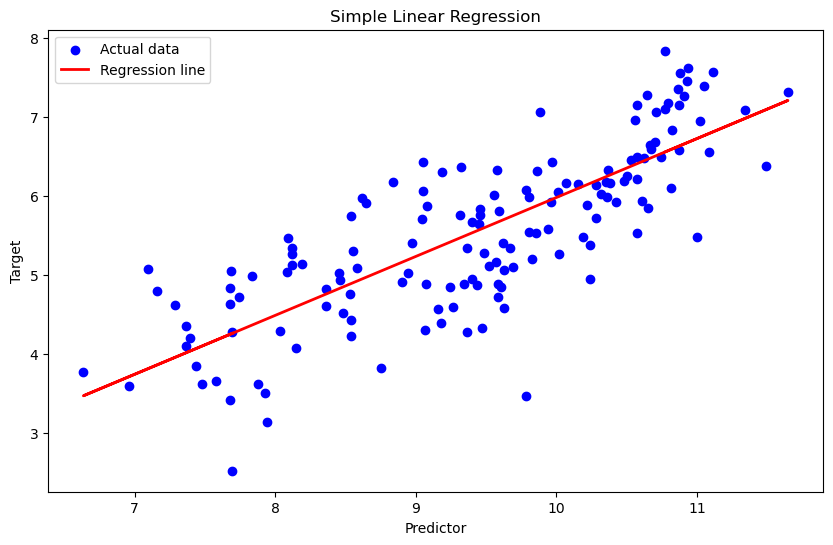

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('Predictor')
plt.ylabel('Target')
plt.legend()
plt.show()

## Multiple Linear Regression

In [31]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [33]:
multiple_r2_linear = r2_score(y_test, y_pred)
multiple_rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {multiple_r2_linear}")
print(f"RMSE: {multiple_rmse_linear}")

R²: 0.6214584825034761
RMSE: 0.6249689451569205


In [34]:
X_full = x.copy()  
y_full_pred = model.predict(X_full)

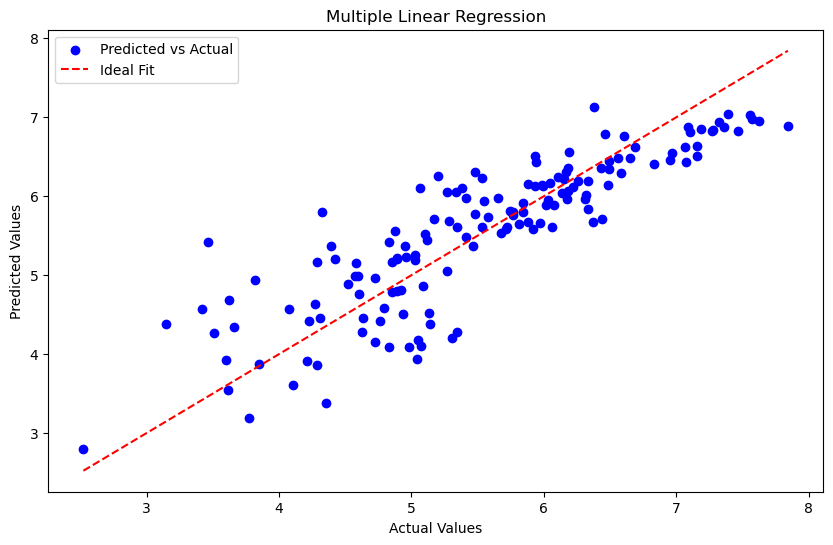

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_full_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [36]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(x)
model_sm = sm.OLS(y, X_with_constant).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     104.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.27e-41
Time:                        23:25:50   Log-Likelihood:                -119.97
No. Observations:                 149   AIC:                             249.9
Df Residuals:                     144   BIC:                             265.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

The multiple linear regression using `Logged GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices` has a higher R-squared score and lower RMSE than the simple linear regression model that only uses `Logged GDP per capita`. All of the predictors have a low p-value which indicate there is strong evidence that they significantly impact our dependent variable `Ladder score`.

## Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [40]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [41]:
r2_poly = r2_score(y_test, y_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2_poly}")
print(f"RMSE: {rmse_poly}")

R²: 0.5161493988070239
RMSE: 0.7065734602789725


In [42]:
comparison_df = pd.DataFrame({
    "Model": ["Multiple Linear Regression", "Polynomial Regression"],
    "R²": [multiple_r2_linear, r2_poly],
    "RMSE": [multiple_rmse_linear, rmse_poly]
})

print(comparison_df)

                        Model        R²      RMSE
0  Multiple Linear Regression  0.621458  0.624969
1       Polynomial Regression  0.516149  0.706573


Overall, based on the R-squared score and RMSE, it seems that the linear regression model performs better than the polynomial regression model. 

# Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report

For a logistic regression model, our target variable needs to be binary. We will convert the `Ladder score` target variable to binary by setting every ladder score that is 7.0 or above to 1 and every ladder score below 7.0 to 0. A ladder_score of 7.0 or above will be the threshold for a country to be considered happy for the purpose of our study.

In [44]:
df_binary = df.copy()
df_binary['Binary_Happiness'] = (df_binary['Ladder score'] >= 7).astype(int)
print(df_binary[['Ladder score', 'Binary_Happiness']].head(30))

    Ladder score  Binary_Happiness
0          7.842                 1
1          7.620                 1
2          7.571                 1
3          7.554                 1
4          7.464                 1
5          7.392                 1
6          7.363                 1
7          7.324                 1
8          7.277                 1
9          7.268                 1
10         7.183                 1
11         7.157                 1
12         7.155                 1
13         7.103                 1
14         7.085                 1
15         7.069                 1
16         7.064                 1
17         6.965                 0
18         6.951                 0
19         6.834                 0
20         6.690                 0
21         6.647                 0
22         6.602                 0
23         6.584                 0
24         6.561                 0
25         6.494                 0
26         6.491                 0
27         6.483    

In [45]:
x = df_binary[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df_binary['Binary_Happiness']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Model Performance Metrics:
Accuracy: 0.83
Precision: 0.29
Recall: 1.00
ROC-AUC: 0.84


In [49]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.29      1.00      0.44         2

    accuracy                           0.83        30
   macro avg       0.64      0.91      0.67        30
weighted avg       0.95      0.83      0.87        30



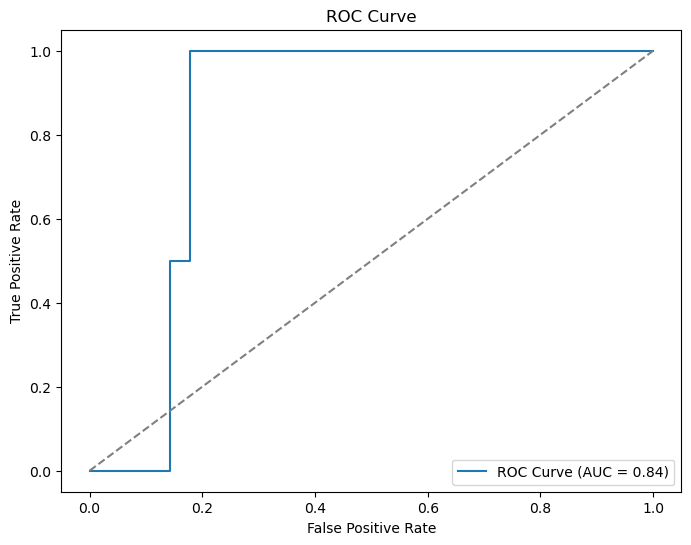

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The AUC of 0.84 indicates our model performed well and our accuracy score of 0.83 indicates the model is accurate in predicting if a country will be happy (ladder score above 7) or not.

# Ridge, Lasso, and Elastic Net Regression

In [51]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [52]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Regression -> R²: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")

Ridge Regression -> R²: 0.60, RMSE: 0.64


When compared to our best performing model so far which is our multiple linear regression model that has a r-squared score of 0.62 and RMSE of 0.62, the ridge regression model slightly underperforms with an r-squared score of 0.60 and RMSE of 0.64. Overall, it seems the regularization does not add much value possibly due to minimal multicollinearity.

In [54]:
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"LASSO Regression -> R²: {lasso_r2:.2f}, RMSE: {lasso_rmse:.2f}")

LASSO Regression -> R²: 0.51, RMSE: 0.71


Because coefficients are shrinked excessively, it seems like this model is performing even worse than the ridge regression model

In [55]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)
elastic_r2 = r2_score(y_test, y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
print(f"Elastic Net Regression -> R²: {elastic_r2:.2f}, RMSE: {elastic_rmse:.2f}")

Elastic Net Regression -> R²: 0.52, RMSE: 0.71


An elastic net regression model aims to balance ridge and lasso but it performs pretty similar to the Lasso Regression model only doing slightly better.

In [56]:
coefficients = pd.DataFrame({
    "Feature": [f"X{i}" for i in range(x.shape[1])],
    "Ridge": ridge.coef_,
    "LASSO": lasso.coef_,
    "Elastic Net": elastic_net.coef_
})

print(coefficients)

  Feature     Ridge     LASSO  Elastic Net
0      X0  0.361356  0.233337     0.306167
1      X1  1.000676  0.000000     0.000000
2      X2  0.050810  0.092773     0.082795
3      X3  1.433745  0.000000     0.000000


In [57]:
comparison = pd.DataFrame({
    "Model": ["Ridge", "LASSO", "Elastic Net"],
    "R²": [ridge_r2, lasso_r2, elastic_r2],
    "RMSE": [ridge_rmse, lasso_rmse, elastic_rmse]
})

print(comparison)

         Model        R²      RMSE
0        Ridge  0.598459  0.643675
1        LASSO  0.513954  0.708174
2  Elastic Net  0.517983  0.705234


The ridge regression model performs the best overall out of these three models with an r-squared score of 0.60 and RMSE of 0.64. However, out of all the models we have done so far, multiple linear regression still performs the best.

# Advanced Regression Models

# Quantile Regression

In [58]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']
X = sm.add_constant(x)

In [59]:
quantile_model = sm.QuantReg(y, X).fit(q=0.5)
print(quantile_model.summary())

                         QuantReg Regression Results                          
Dep. Variable:           Ladder score   Pseudo R-squared:               0.5181
Model:                       QuantReg   Bandwidth:                      0.4866
Method:                 Least Squares   Sparsity:                        1.357
Date:                Tue, 26 Nov 2024   No. Observations:                  149
Time:                        23:25:50   Df Residuals:                      144
                                        Df Model:                            4
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.8286      0.563     -6.800      0.000      -4.941      -2.716
Logged GDP per capita            0.2439      0.106      2.294      0.023       0.034       0.454
Social support                   2.1391      0.816      2.6

In [60]:
y_pred = quantile_model.predict(X)
print(y_pred)

0      6.992911
1      7.056500
2      7.080484
3      7.145102
4      6.922353
         ...   
144    4.157589
145    5.420864
146    4.720727
147    4.334367
148    2.643188
Length: 149, dtype: float64


From the quantile regression model, we see that all of the predictors have a strong effect on the ladder score

## Poisson Regression

In [61]:
from sklearn.linear_model import PoissonRegressor

In [62]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
poisson_model = PoissonRegressor(alpha=0.1)
poisson_model.fit(X_train, y_train)

PoissonRegressor(alpha=0.1)

In [64]:
y_pred = poisson_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Poisson Regression MSE: {mse:.2f}")

Poisson Regression MSE: 0.45


An MSE of 0.45 for the Poisson Regression model indicateds that it performs well for count-based predictions but this model is limited by its assumption that variance equals the mean.

## Negative Binomial Regression

In [65]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']
X = sm.add_constant(x)

In [66]:
nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Ladder score   No. Observations:                  149
Model:                            GLM   Df Residuals:                      144
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -414.79
Date:                Tue, 26 Nov 2024   Deviance:                       1.3522
Time:                        23:25:50   Pearson chi2:                     1.28
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02426
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Overall, the negative binomial model seems to perform poorly as none of the predictors are significant.

## Zero Inflated and Hurdle Regression

In [67]:
from statsmodels.discrete.count_model import ZeroInflatedPoisson

In [68]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']
X = sm.add_constant(x)

In [69]:
zip_model = ZeroInflatedPoisson(y, X).fit()
print(zip_model.summary())

         Current function value: 1.806531
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:            Ladder score   No. Observations:                  149
Model:             ZeroInflatedPoisson   Df Residuals:                      144
Method:                            MLE   Df Model:                            4
Date:                 Tue, 26 Nov 2024   Pseudo R-squ.:                 0.04216
Time:                         23:25:50   Log-Likelihood:                -269.17
converged:                       False   LL-Null:                       -281.02
Covariance Type:             nonrobust   LLR p-value:                 9.183e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
inflate_const                  -

C:\Users\ericz\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The Zero-Inflated Poisson Regression model seems to be a poor fit as there are no significant predictors.

## Cox Regression for Survival Analysis

In [70]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

In [71]:
df_cox = df.copy()
df_cox['time_to_event'] = df_cox['Healthy life expectancy']
df_cox['event_occurred'] = (df_cox['Ladder score'] >= 7).astype(int)

In [72]:
features = ['Logged GDP per capita', 'Social support', 'Freedom to make life choices']
df_cox = df_cox[['time_to_event', 'event_occurred'] + features]

In [73]:
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='time_to_event', event_col='event_occurred')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 149 total observations, 132 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event_occurred'
      baseline estimation = breslow
   number of observations = 149
number of events observed = 17
   partial log-likelihood = -39.31
         time fit was run = 2024-11-27 05:25:50 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
Logged GDP per capita         -1.51       0.22       1.11            -3.69             0.66                 0.02                 1.94
Social support                 6.00     404.21      11.27           -16.10            28.10                 0.00             1.60e+12
Freedom to make life choices  15.90   8.08e+06       6.93             2.33            29.48                10.25             6.37e+12

                               cmp to     z    p   -log2(p)
covariate                                                  
Logged GDP per capita            0.00 -1.36 0.17       2.53
Social support                   0.00  0.53 0.59       0.75
Freedom to make life choices     0.00  2.30 0.02       5.53
---
Concordance = 0.76
Partial AIC = 84.62
log-likelihood ratio test = 17.80 on 3 df
-log2(p) of ll-ratio test = 11.01

The Cox regression model suggests that Freedom to make life choices significantly increases the hazard (shorter time to reaching a happiness milestone). The other predictors do not show statistically significant effects. The concordance of 0.76 indicates a fairly good model fit for survival analysis.

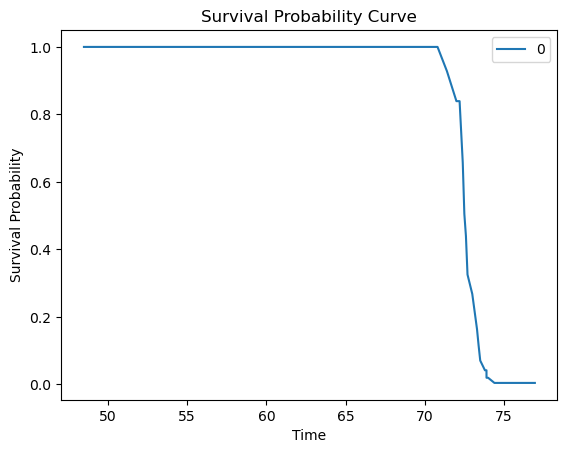

In [74]:
survival_prob = cph.predict_survival_function(df_cox.iloc[:1])
survival_prob.plot()
plt.title('Survival Probability Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

The sharp drop at higher time values indicates that many countries achieve higher happiness milestones around a specific range of predictor values.

## Partial Least Squares Regression and Principal Component Regression

In [75]:
from sklearn.cross_decomposition import PLSRegression

In [76]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Partial Least Squares Regression

In [77]:
n_components = min(X_train.shape[0], X_train.shape[1], 10)
pls = PLSRegression(n_components = 2)
pls.fit(X_train, y_train)
y_pred_pls = pls.predict(X_test)
r2_pls = r2_score(y_test, y_pred_pls)
rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))
print(f"PLS Regression -> R²: {r2_pls:.2f}, RMSE: {rmse_pls:.2f}")

PLS Regression -> R²: 0.62, RMSE: 0.63


Demonstrates a very similar performance to our multiple linear regression model that had an r-squared score of 0.62 and an RMSE of 0.62 

### Principal Component Regression (PCR)

In [78]:
n_components = min(X_train.shape[0], X_train.shape[1])  
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [79]:
lr = LinearRegression()
lr.fit(X_train_pca, y_train)
y_pred_pcr = lr.predict(X_test_pca)

In [80]:
r2_pcr = r2_score(y_test, y_pred_pcr)
rmse_pcr = np.sqrt(mean_squared_error(y_test, y_pred_pcr))
print(f"PCR -> R²: {r2_pcr:.2f}, RMSE: {rmse_pcr:.2f}")

PCR -> R²: 0.52, RMSE: 0.70


In [81]:
comparison = pd.DataFrame({
    "Model": ["PLSR", "PCR"],
    "R²": [r2_pls, r2_pcr],
    "RMSE": [rmse_pls, rmse_pcr]
})
print(comparison)

  Model        R²      RMSE
0  PLSR  0.619514  0.626572
1   PCR  0.523566  0.701137


The principal component regression model (PCR) performs worse than the partial least squares regression model (PLSR). This could be due to to its focus on maximizing predictor variance, not correlation with the target.

# Model Evaluation and Comparison

Provided below is an overview comparing the results between the different models we ran.

In [82]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Multiple Linear Regression", "Polynomial Regression", "Ridge", "LASSO", "Elastic Net", "PLSR", "PCR"],
    "R²": [r2_linear, multiple_r2_linear, r2_poly, ridge_r2, lasso_r2, elastic_r2, r2_pls, r2_pcr],
    "RMSE": [rmse_linear, multiple_rmse_linear, rmse_poly, ridge_rmse, lasso_rmse, elastic_rmse, rmse_pls, rmse_pcr]
})
print(comparison)
print()
print("Logistic Regression Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print()
print(f"Poisson Regression MSE: {mse:.2f}")

                        Model        R²      RMSE
0           Linear Regression  0.532838  0.694281
1  Multiple Linear Regression  0.621458  0.624969
2       Polynomial Regression  0.516149  0.706573
3                       Ridge  0.598459  0.643675
4                       LASSO  0.513954  0.708174
5                 Elastic Net  0.517983  0.705234
6                        PLSR  0.619514  0.626572
7                         PCR  0.523566  0.701137

Logistic Regression Model Performance Metrics:
Accuracy: 0.83
Precision: 0.29
Recall: 1.00
ROC-AUC: 0.84

Poisson Regression MSE: 0.45


Overall, across the various models that would predict the ladder score, which is the score on how happy a country is in 2021, the Multiple Linear Regression (MLR) emerged as the best overall model, with an r-squared of 0.62 and RMSE of 0.62, striking a balance between simplicity, interpretability, and predictive performance.  Logistic regression achieved an ROC-AUC of 0.84 and recall of 1.00 but had low precision (0.29), indicating it excels at identifying all happy countries but struggles with false positives. Advanced techniques like Partial Least Squares Regression (PLSR) performed equally well (r-squared = 0.62, RMSE = 0.63) but added robustness to multicollinearity, making it a strong alternative to MLR. Quantile Regression offered a unique perspective by highlighting the impact of predictors across the happiness distribution, revealing significant effects of freedom to make life choices and social support. Specialized models such as Cox Regression identified freedom to make life choices as a critical variable for achieving happiness milestones, though its application was limited to survival analysis. Models designed for count data, including Poisson Regression, Negative Binomial Regression, and Zero-Inflated Poisson, were less effective due to poor fit and limited significance of predictors. Similarly, Polynomial Regression and regularization methods like Ridge, LASSO, and Elastic Net did not outperform MLR. Overall, Multiple Linear Regression remains the most suitable model for predicting happiness scores, given its superior performance and straightforward application. For deeper insights, Quantile Regression or Cox Regression can complement the findings.

## K-Fold Cross-Validation

We chose to go with the multiple linear regression model. Now lets implement a K-Fold Cross-Validation to the model to improve it.

In [83]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

In [84]:
x = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']] 
y = df['Ladder score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
model = LinearRegression()

In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print(f'R2 scores for each fold: {r2_scores}')
print(f'Mean R2: {r2_scores.mean():.2f}')
print(f'MSE scores for each fold: {-scores}')
print(f'Mean MSE: {-scores.mean():.2f}')
print(f'Standard deviation of MSE: {scores.std():.2f}')

R2 scores for each fold: [0.62145848 0.78079873 0.58305406 0.77798792 0.83027759]
Mean R2: 0.72
MSE scores for each fold: [0.39058618 0.24288473 0.45411619 0.26964079 0.19347062]
Mean MSE: 0.31
Standard deviation of MSE: 0.10


The multiple linear regression model's performance showed significant improvement after applying k-fold cross-validation. The 
r-squared score increased from 0.62 to an average of 0.72, indicating that the model now explains 72% of the variance in the data compared to 62% previously. The mean squared error (MSE) also decreased from 0.62 to an average of 0.32, demonstrating a reduction in prediction errors and improved accuracy.

# Results and Interpretation

## Key Findings and Insights

The multiple linear regression (MLR) model showed significant improvement after applying k-fold cross-validation. The 
r-squared score increased from 0.62 to an average of 0.72, demonstrating that the model now explains 72% of the variance in the data compared to the previous 62%. Similarly, the Mean Squared Error (MSE) decreased from 0.62 to an average of 0.32, indicating a reduction in prediction errors and improved accuracy. The key predictors of happiness were identified as logged GDP per capita, social support, healthy life expectancy, and freedom to make life choices as seen in the quantile regression model where all these predictors had a p-value of under 0.01 and the Cox Regression model demostrating that the freedom to make life choices greatly reduced the time to reach a happiness milestone. Overall, my hypothesis was partially right as some of these factors have a considerable relationship in a country's ladder score. Generosity and perceptions of corruption as seen in their scatter-plots do not seem to have a strong relationship with ladder score. K-fold cross-validation's ability to provide more robust performance metrics also has significant implications. It reduces model bias and variance, ensuring that the model does not overfit specific subsets of the data. By leveraging this technique, researchers and policymakers can more confidently use the multiple linear regression model's predictions to make data-driven decisions aimed at improving global happiness outcomes.

# Limitations

Despite the improvements in performance from implementing the K-fold cross-validation, the model is subject to several limitations. The multiple linear regression model assumes linear relationships between predictors and the target variable, which may oversimplify complex interactions. Additionally, the presence of outliers or multicollinearity among predictors can still influence the results, even with the use of cross-validation techniques. The dataset itself is limited to countries reporting specific indicators, which may not fully capture global diversity in happiness. Some factors, such as cultural norms or political stability, are not included in the analysis but could play a significant role in determining happiness levels. Expanding the range of predictors could potentially enhance the model's predictive power. Finally, while the k-fold cross-validation process ensures robust metrics, the findings may not generalize well to different datasets or time periods without retraining and revalidation. As with any model, its applicability to new data requires careful consideration of changes in context and the inclusion of relevant, up-to-date predictors.